In [104]:
import numpy as np
import pandas as pd
import re


In [105]:
kcse_df = pd.read_csv("C:/Users/JWAITHIRA/Desktop/ICT_TRACK/KCSE.csv")

In [106]:
kcse_df.info()
kcse_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  45 non-null     object
 1   A       45 non-null     int64 
 2   A-      45 non-null     int64 
 3   B+      45 non-null     int64 
 4   B       45 non-null     int64 
 5   B-      45 non-null     int64 
 6   C+      45 non-null     int64 
 7   C       45 non-null     int64 
 8   C-      45 non-null     int64 
 9   D+      45 non-null     int64 
 10  D       45 non-null     int64 
 11  D-      45 non-null     int64 
 12  E       45 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 4.7+ KB


,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
0,FEMALE(2016),58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007
1,MALE(2016),83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322
2,ALL(2016),141,4645,10975,17216,23745,32207,44792,61026,80951,112135,149929,33399
3,MALE(2015),2024,7952,13517,19826,25312,29556,33437,37482,40181,40442,25531,3127
4,FEMALE(2015),661,4117,8410,13634,19269,25214,31476,36633,38976,39113,23127,2223


In [107]:
kcse_df

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
0,FEMALE(2016),58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007
1,MALE(2016),83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322
2,ALL(2016),141,4645,10975,17216,23745,32207,44792,61026,80951,112135,149929,33399
3,MALE(2015),2024,7952,13517,19826,25312,29556,33437,37482,40181,40442,25531,3127
4,FEMALE(2015),661,4117,8410,13634,19269,25214,31476,36633,38976,39113,23127,2223
5,ALL(2015),2685,12069,21927,33460,44581,54770,64913,74115,79157,79555,48658,5350
6,MALE(2006),148,638,1195,1627,2108,2569,2984,3299,3418,3291,2635,834
7,FEMALE(2006),69,242,446,772,1234,1873,2554,3193,3519,3513,2909,897
8,ALL(2006),217,880,1641,2399,3342,4442,5538,6492,6937,6804,5544,1731
9,MALE(2007),110,563,1159,1761,2268,2871,3314,3609,3721,3493,2762,779


In [108]:
year = []
for i in kcse_df['Gender']:
    year.append(''.join(filter(lambda i: i.isdigit(), i)))
year    

kcse_df['Year'] = year

In [109]:
gender = []
for i in kcse_df['Gender']:
    gender.append("".join(re.split("[^a-zA-Z]*", i)))
gender

kcse_df['Gender']=gender
    
    

In [110]:
kcse_df.Year.value_counts()

2016    3
2015    3
2006    3
2007    3
2008    3
2009    3
2010    3
2011    3
2012    3
2013    3
2014    3
2017    3
2018    3
2019    3
2020    3
Name: Year, dtype: int64

In [111]:
kcse_df.Gender.value_counts()

FEMALE    15
MALE      15
ALL       15
Name: Gender, dtype: int64

In [112]:
# kcse_df.set_index('Gender',inplace=True)
# kcse_df.index[-2]
# kcse_df.rename({kcse_df.index[-2] : 'FEMALE'} , axis=0,inplace=True)
# kcse_df.index.value_counts()

In [113]:
kcse_df.set_index('Gender',inplace=True)

In [114]:
kcse_df_ch = kcse_df == kcse_df.shift(1) + kcse_df.shift(2)

In [115]:
ndf = pd.DataFrame()

for col in kcse_df:
    vals = []
    for i in range(kcse_df.shape[0]):
        
        if (i + 1) % 3 == 0:
            vals.append(kcse_df[col][i-1] + kcse_df[col][i-2])
        else:
            vals.append(kcse_df[col][i])
    ndf[col] = vals


ndf.index = kcse_df.index
ndf['Year'] = kcse_df['Year']
ndf
    
check = ndf.drop('Year', axis= 1) == ndf.drop('Year', axis= 1).shift(1) + ndf.drop('Year', axis= 1).shift(2)
check[check.index.str.startswith('ALL')].all().all()



True

In [116]:
kcse_df[kcse_df.index.str.startswith('ALL')].all(axis = 1)

Gender
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
dtype: bool

In [117]:
ndf.head()

,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year
Gender,,,,,,,,,,,,,
FEMALE,58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007,2016
MALE,83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322,2016
ALL,141,4645,10975,17216,23745,32207,44792,61026,80951,112135,149929,33329,2016
MALE,2024,7952,13517,19826,25312,29556,33437,37482,40181,40442,25531,3127,2015
FEMALE,661,4117,8410,13634,19269,25214,31476,36633,38976,39113,23127,2223,2015


In [118]:
ndf.sort_values(by=['Year'],inplace=True)

In [119]:
ndf.reset_index(inplace=True)

In [120]:
ndf_1=  ndf.groupby([ndf.Gender])[ndf.columns].sum()
ndf_1

,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
Gender,,,,,,,,,,,,
ALL,15523,79583,157056,246150,337964,444833,587546,747223,884495,1064748,1069536,200826
FEMALE,4927,28398,59081,97993,142938,200881,281746,367161,435254,534061,540494,95000
MALE,10596,51185,97975,148157,195026,243952,305800,380062,449241,530687,529042,105826


In [121]:
ndf_2 = ndf_1.copy()

In [122]:
ndf_2["sum"] = ndf_2.sum(axis=1)

In [123]:
ndf_2.head()

,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,sum
Gender,,,,,,,,,,,,,
ALL,15523,79583,157056,246150,337964,444833,587546,747223,884495,1064748,1069536,200826,5835483
FEMALE,4927,28398,59081,97993,142938,200881,281746,367161,435254,534061,540494,95000,2787934
MALE,10596,51185,97975,148157,195026,243952,305800,380062,449241,530687,529042,105826,3047549


Total number of ALL students =  5,835,483  

Total no. of FEMALE students =  2,787,934  

Total no. of MALE students = 3,047,549 (higher)

## Visualizations

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'TOTAL NUMBERS PRESENT IN THE DATASET')]

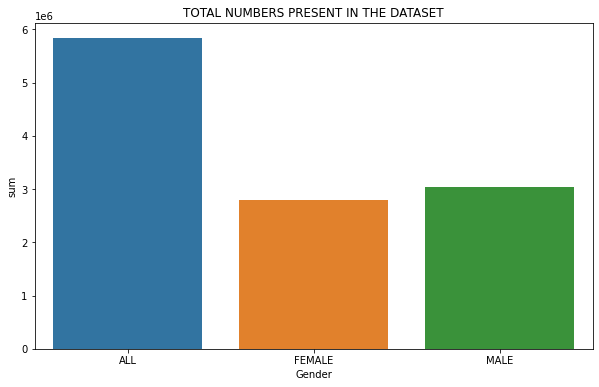

In [126]:
figure = plt.figure(figsize = (10,6))
figure
sns.barplot(x=ndf_2.index,y='sum',data=ndf_2 ).set(title='TOTAL NUMBERS PRESENT IN THE DATASET')


In [127]:
ndf_transp = ndf_1.T

In [128]:
ndf_transp

Gender,ALL,FEMALE,MALE
A,15523,4927,10596
A-,79583,28398,51185
B+,157056,59081,97975
B,246150,97993,148157
B-,337964,142938,195026
C+,444833,200881,243952
C,587546,281746,305800
C-,747223,367161,380062
D+,884495,435254,449241
D,1064748,534061,530687


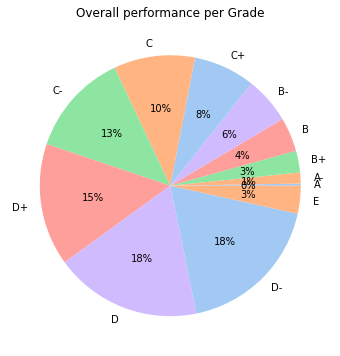

In [136]:

figure = plt.figure(figsize = (13,6))
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(ndf_transp["ALL"], labels = ndf_transp.index, colors = colors, autopct='%.0f%%')
plt.title("Overall performance per Grade")

plt.show()

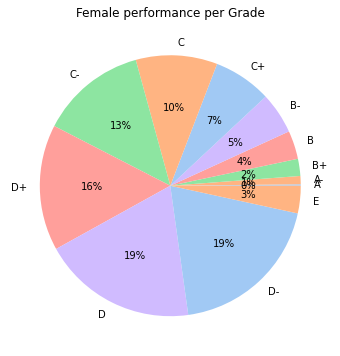

In [138]:
figure = plt.figure(figsize = (10,6))
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(ndf_transp["FEMALE"], labels = ndf_transp.index, colors = colors, autopct='%.0f%%')
plt.title("Female performance per Grade")
plt.show()

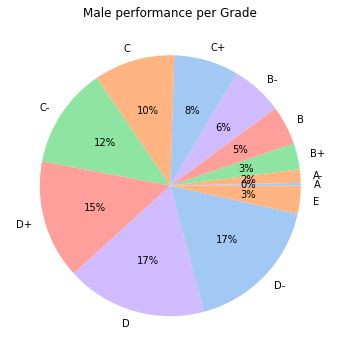

In [149]:
figure = plt.figure(figsize = (10,6))
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(ndf_transp["MALE"], labels = ndf_transp.index, colors = colors, autopct='%.0f%%')
plt.title("Male performance per Grade")
plt.show()

In [ ]:
ndf.head(6)

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year
0,ALL,217,880,1641,2399,3342,4442,5538,6492,6937,6804,5544,1731,2006
1,MALE,148,638,1195,1627,2108,2569,2984,3299,3418,3291,2635,834,2006
2,FEMALE,69,242,446,772,1234,1873,2554,3193,3519,3513,2909,897,2006
3,ALL,160,754,1632,2605,3607,4971,6179,7048,7538,7223,5686,1569,2007
4,FEMALE,50,191,473,844,1339,2100,2865,3439,3817,3730,2924,790,2007
5,MALE,110,563,1159,1761,2268,2871,3314,3609,3721,3493,2762,779,2007


In [ ]:
# figure = plt.figure(figsize = (10,6))
# sns.countplot('Gender',hue='A',data=ndf)

[Text(0.5, 1.0, 'Distribution of E (2006-2020)')]

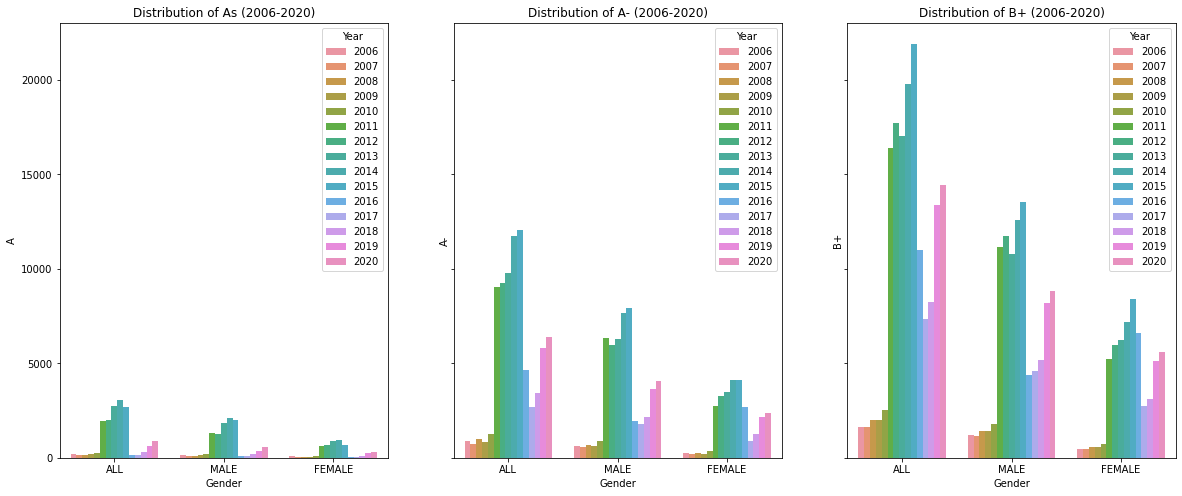

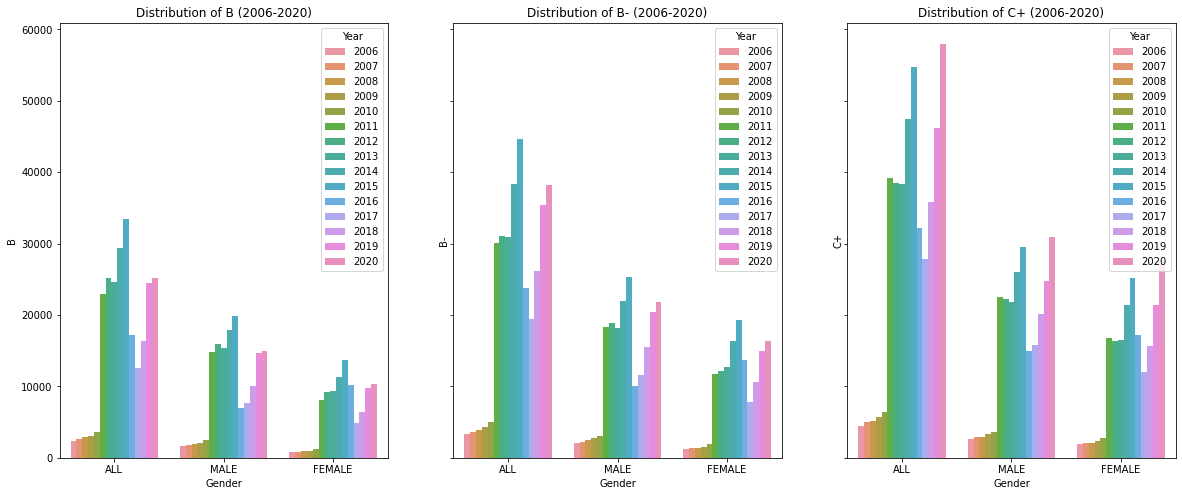

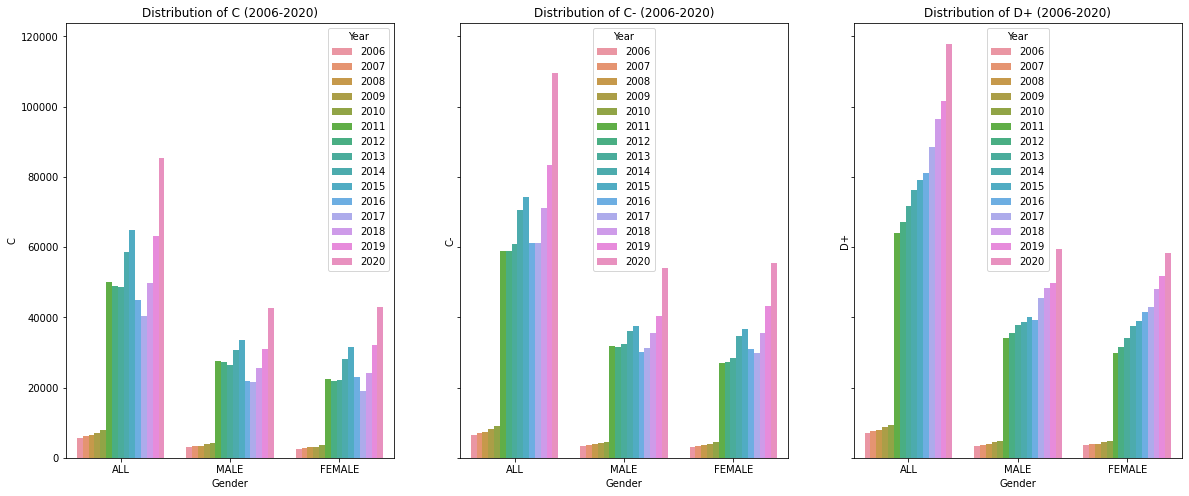

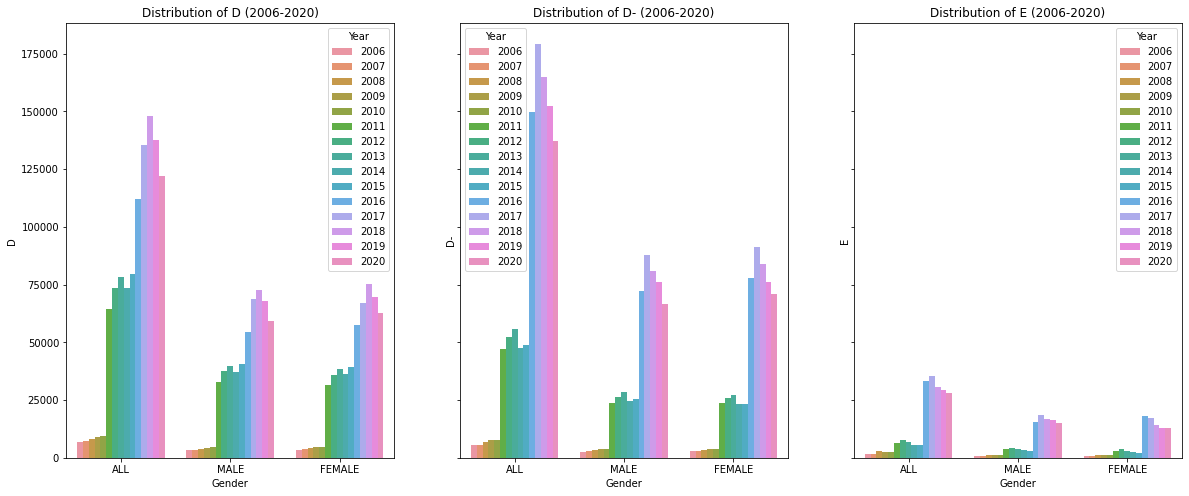

In [ ]:
_,ax = plt.subplots(1,3, sharey=True, figsize=(20,8))
sns.barplot(x='Gender',y='A',data=ndf , hue = 'Year', ax=ax[0]).set(title = "Distribution of As (2006-2020)")
sns.barplot(x='Gender',y='A-',data=ndf , hue = 'Year', ax=ax[1]).set(title = "Distribution of A- (2006-2020)")
sns.barplot(x='Gender',y='B+',data=ndf , hue = 'Year', ax=ax[2]).set(title = "Distribution of B+ (2006-2020)")

_,ax = plt.subplots(1,3, sharey=True, figsize=(20,8))
sns.barplot(x='Gender',y='B',data=ndf , hue = 'Year', ax=ax[0]).set(title = "Distribution of B (2006-2020)")
sns.barplot(x='Gender',y='B-',data=ndf , hue = 'Year', ax=ax[1]).set(title = "Distribution of B- (2006-2020)")
sns.barplot(x='Gender',y='C+',data=ndf , hue = 'Year', ax=ax[2]).set(title = "Distribution of C+ (2006-2020)")

_,ax = plt.subplots(1,3, sharey=True, figsize=(20,8))
sns.barplot(x='Gender',y='C',data=ndf , hue = 'Year', ax=ax[0]).set(title = "Distribution of C (2006-2020)")
sns.barplot(x='Gender',y='C-',data=ndf , hue = 'Year', ax=ax[1]).set(title = "Distribution of C- (2006-2020)")
sns.barplot(x='Gender',y='D+',data=ndf , hue = 'Year', ax=ax[2]).set(title = "Distribution of D+ (2006-2020)")

_,ax = plt.subplots(1,3, sharey=True, figsize=(20,8))
sns.barplot(x='Gender',y='D',data=ndf , hue = 'Year', ax=ax[0]).set(title = "Distribution of D (2006-2020)")
sns.barplot(x='Gender',y='D-',data=ndf , hue = 'Year', ax=ax[1]).set(title = "Distribution of D- (2006-2020)")
sns.barplot(x='Gender',y='E',data=ndf , hue = 'Year', ax=ax[2]).set(title = "Distribution of E (2006-2020)")



For the high grades:A,A-,B+,B,B-,C+ there is a significnat difference between the male and female students.The male students in this grades are observably higher than the female students .  


From C to E ,the grades equalize our between the sexes  

The highest grade (A) and the lowest grade (E) have the least numbe of people


<AxesSubplot:xlabel='Gender', ylabel='E'>

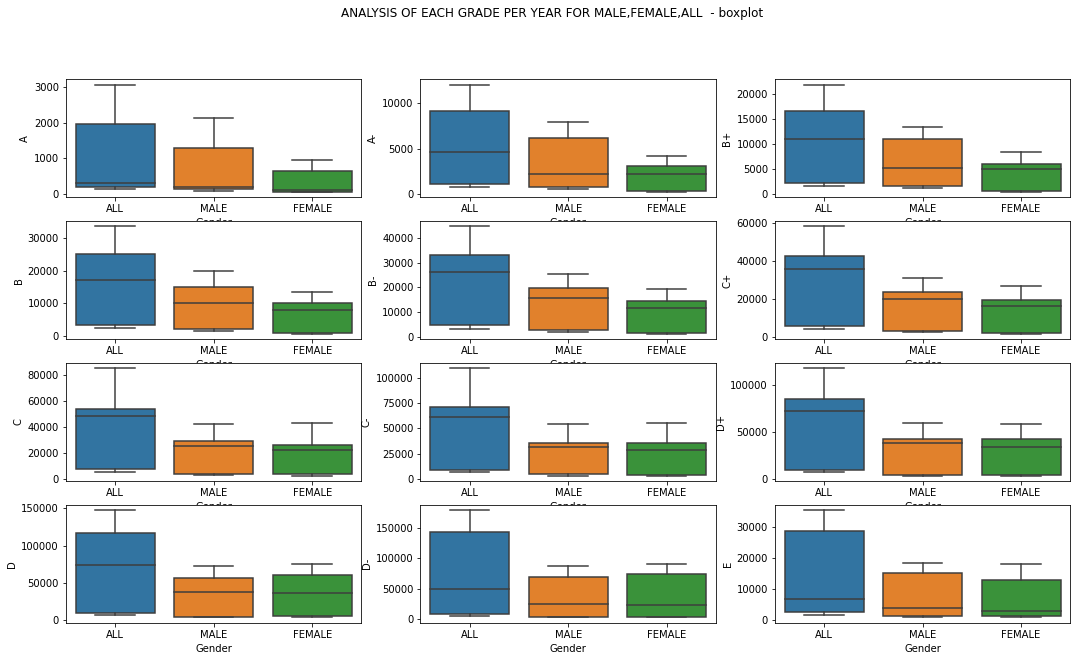

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(18, 10))

fig.suptitle('ANALYSIS OF EACH GRADE PER YEAR FOR MALE,FEMALE,ALL  - boxplot')

sns.boxplot(ax=axes[0, 0],x='Gender',y='A',data=ndf )
sns.boxplot(ax=axes[0, 1],x='Gender',y='A-',data=ndf )
sns.boxplot(ax=axes[0, 2],x='Gender',y='B+',data=ndf )
sns.boxplot(ax=axes[1, 0],x='Gender',y='B',data=ndf )
sns.boxplot(ax=axes[1, 1],x='Gender',y='B-',data=ndf )
sns.boxplot(ax=axes[1, 2],x='Gender',y='C+',data=ndf )
sns.boxplot(ax=axes[2, 0],x='Gender',y='C',data=ndf )
sns.boxplot(ax=axes[2, 1],x='Gender',y='C-',data=ndf )
sns.boxplot(ax=axes[2, 2],x='Gender',y='D+',data=ndf )
sns.boxplot(ax=axes[3, 0],x='Gender',y='D',data=ndf )
sns.boxplot(ax=axes[3, 1],x='Gender',y='D-',data=ndf )
sns.boxplot(ax=axes[3, 2],x='Gender',y='E',data=ndf )

In [ ]:
ndf_3 = ndf.groupby(['Gender','Year'])[ndf.columns].sum()

In [ ]:
ndf_3["sum"] = ndf_3.sum(axis=1)
ndf_3

A     A-     B+      B     B-     C+      C      C-      D+  \
Gender Year                                                                   
ALL    2006   217    880   1641   2399   3342   4442   5538    6492    6937   
       2007   160    754   1632   2605   3607   4971   6179    7048    7538   
       2008   168    972   2009   2877   3886   5101   6409    7442    8024   
       2009   196    846   1989   3098   4355   5699   7040    8243    8849   
       2010   279   1236   2531   3677   4969   6361   7805    8925    9438   
       2011  1930   9063  16390  22944  30115  39216  49965   58845   63853   
       2012  1975   9235  17730  25183  31110  38471  48905   58748   67203   
       2013  2722   9768  17013  24656  30864  38351  48571   60763   71803   
       2014  3073  11768  19814  29319  38315  47428  58688   70677   76198   
       2015  2685  12069  21927  33460  44581  54770  64913   74115   79157   
       2016   141   4645  10975  17216  23745  32207  44792   61026   80951   
       2017   142   2714   7344  12628  19385  27860  40474   61040   88447   
       2018   315   3417   8268  16403  26156  35818  49707   71047   96512   
       2019   627   5796  13366  24478  35340  46139  63102   83358  101687   
       2020   893   6420  14427  25207  38194  57999  85458  109454  117898   
FEMALE 2006    69    242    446    772   1234   1873   2554    3193    3519   
       2007    50    191    473    844   1339   2100   2865    3439    3817   
       2008    66    274    596    920   1417   2129   2946    3618    4043   
       2009    58    218    553    974   1572   2388   3216    3996    4447   
       2010    97    344    744   1219   1875   2722   3637    4389    4734   
       2011   615   2741   5240   8151  11771  16742  22334   26890   29760   
       2012   698   3288   5977   9221  12174  16291  21771   27166   31548   
       2013   867   3492   6237   9341  12648  16515  22079   28378   34100   
       2014   940   4124   7208  11378  16318  21450  27989   34662   37449   
       2015   661   4117   8410  13634  19269  25214  31476   36633   38976   
       2016    58   2685   6581  10204  13649  17238  22960   30979   41632   
       2017    61    901   2748   4890   7754  12032  18968   29834   42925   
       2018   114   1238   3111   6367  10608  15687  24015   35575   48120   
       2019   269   2172   5145   9803  14961  21425  32084   43083   51813   
       2020   304   2371   5612  10275  16349  27075  42852   55326   58371   
MALE   2006   148    638   1195   1627   2108   2569   2984    3299    3418   
       2007   110    563   1159   1761   2268   2871   3314    3609    3721   
       2008   102    698   1413   1957   2469   2972   3463    3824    3981   
       2009   138    628   1436   2124   2783   3311   3824    4247    4402   
       2010   182    892   1787   2458   3094   3639   4168    4536    4704   
       2011  1315   6322  11150  14793  18344  22474  27631   31955   34093   
       2012  1277   5947  11753  15962  18936  22180  27134   31582   35655   
       2013  1855   6276  10776  15315  18216  21836  26492   32385   37703   
       2014  2133   7644  12606  17941  21997  25978  30699   36015   38749   
       2015  2024   7952  13517  19826  25312  29556  33437   37482   40181   
       2016    83   1960   4394   7012  10096  14969  21832   30047   39319   
       2017    81   1813   4596   7738  11631  15828  21506   31206   45522   
       2018   201   2179   5157  10036  15548  20131  25692   35472   48392   
       2019   358   3624   8221  14675  20379  24714  31018   40275   49874   
       2020   589   4049   8815  14932  21845  30924  42606   54128   59527   

                  D      D-      E     sum  
Gender Year                                 
ALL    2006    6804    5544   1731   45967  
       2007    7223    5686   1569   48972  
       2008    8092    6993   2755   54728  
       2009    8850    7503   2583   59251  
       2010    9330    7788   26

No. of All students sitting for their exams increased thoughout the years from 2006 to 2016  

No. of FEMALE students increased through the years  ,but between 2016 snd 2017the number reduced by 3575

No. of MALLE students increased also but between 2015 and 2016 the number reduced by 6494

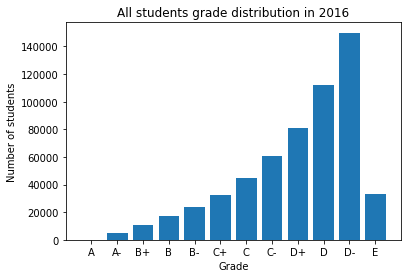

In [157]:
ndf_4 = ndf.set_index(['Gender', 'Year'])
plt.bar(ndf_4.columns, ndf_4.loc[('ALL', '2016')])
plt.xlabel("Grade")
plt.ylabel("Number of students")
plt.title("All students grade distribution in 2016")

plt.show()

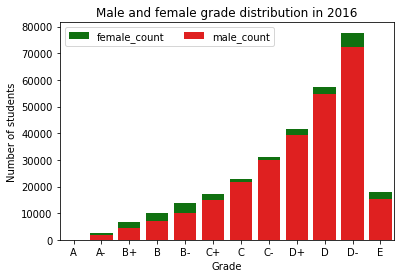

In [158]:
b1 = sns.barplot(y=ndf_4.loc[('FEMALE', '2016')], x =ndf_4.columns, label="female_count", color="green")
b2 = sns.barplot(y=ndf_4.loc[('MALE', '2016')], x =ndf_4.columns, label="male_count", color="red")
plt.xlabel("Grade")
plt.ylabel("Number of students")
plt.title("Male and female grade distribution in 2016")
plt.legend(ncol=2, loc="upper left", frameon=True)
plt.show()

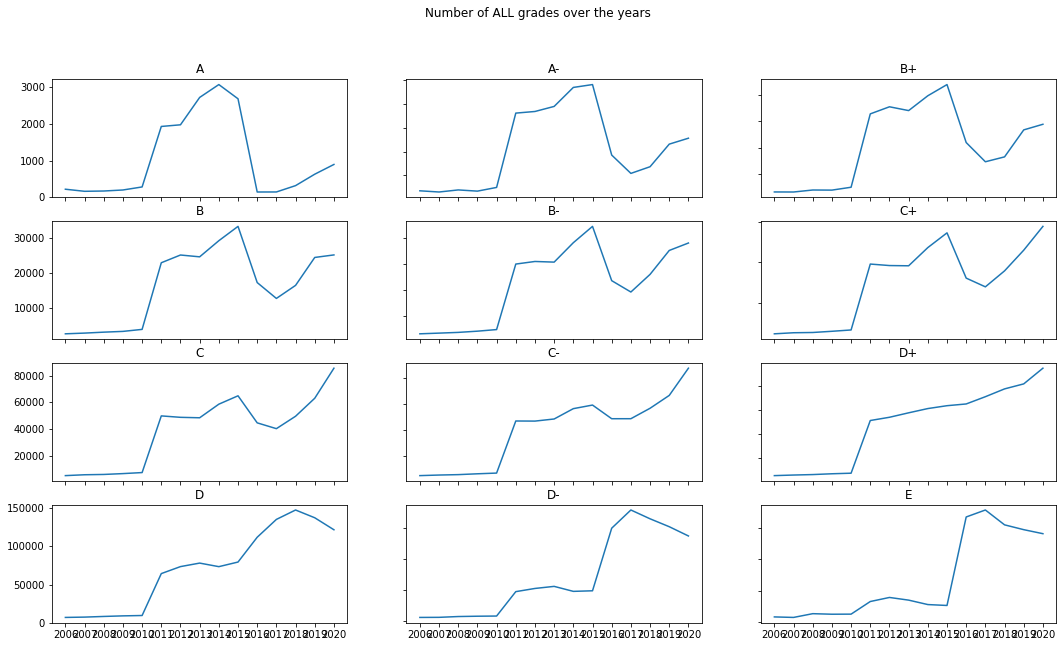

In [180]:
fig, axes = plt.subplots(4, 3, figsize=(18, 10))

fig.suptitle('Number of ALL grades over the years')



axes[0, 0].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'A'])
axes[0, 0].set_title('A')
axes[0, 1].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'A-'])
axes[0, 1].set_title('A-')
axes[0, 2].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'B+'])
axes[0, 2].set_title('B+')
axes[1, 0].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'B'])
axes[1, 0].set_title('B')
axes[1, 1].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'B-'])
axes[1, 1].set_title('B-')
axes[1, 2].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'C+'])
axes[1, 2].set_title('C+')
axes[2, 0].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'C'])
axes[2, 0].set_title('C')
axes[2, 1].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'C-'])
axes[2, 1].set_title('C-')
axes[2, 2].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'D+'])
axes[2, 2].set_title('D+')
axes[3, 0].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'D'])
axes[3, 0].set_title('D')
axes[3, 1].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'D-'])
axes[3, 1].set_title('D-')
axes[3, 2].plot(ndf_4.sort_index(level = 1).loc['ALL'].index, ndf_4.sort_index(level = 1).loc['ALL', 'E'])
axes[3, 2].set_title('E')





# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()



There is a sharp change in the high grades between 2011 and 2015.  
This can be attributed to the high exam cheating in these years 
